# Trabalho Prático: Tomada de Decisão em Limpeza de Dados

**Dataset:** [Ames Housing Dataset](https://www.kaggle.com/datasets/prevek18/ames-housing-dataset)

**Objetivo:** Este trabalho desafia você a atuar como um cientista de dados responsável por preparar um dataset bruto para modelagem. Em vez de seguir instruções, sua tarefa é analisar, tomar decisões informadas e justificar cada passo do processo de limpeza e transformação. O objetivo final é produzir um DataFrame limpo e robusto, pronto para ser usado em um modelo de machine learning para prever o preço de venda das casas.

---

### Seção 0: Configuração Inicial

**Enunciado:** Importe as bibliotecas necessárias (pandas, numpy, matplotlib, seaborn) e carregue o dataset `train.csv` em um DataFrame chamado `df`.

In [70]:
# Célula de resposta para a Seção 0

# Importe as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure o estilo dos gráficos
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Carregue o dataset
try:
    df = pd.read_csv('../data/AmesHousing.csv')
    print("Dataset carregado com sucesso!")
except FileNotFoundError:
    print("Arquivo 'AmesHousing.csv' não encontrado. Certifique-se de que ele está no diretório correto.")

Dataset carregado com sucesso!


### Seção 1: Diagnóstico e Formulação de Hipóteses

**Enunciado:** Todo bom projeto de limpeza começa com um diagnóstico completo. Sua primeira tarefa é entender profundamente o estado inicial dos dados.

1.  Execute uma análise de perfilamento básica no dataset. Utilize os métodos que julgar necessários (`.shape`, `.info()`, `.head()`, `.describe()`, etc.) para obter uma visão geral.
2.  **Tomada de Decisão:** Com base na sua análise inicial, formule hipóteses sobre os principais desafios deste dataset em uma célula de Markdown. Quais colunas parecem mais problemáticas? Que tipo de ações você *acha* que precisará tomar? (Ex: "A coluna 'Alley' tem muitos valores ausentes, talvez precise ser removida." ou "A coluna 'SalePrice' parece ter valores muito altos, precisarei investigar outliers.").

In [71]:
# Célula de resposta para a Seção 1

# Explore o dataset livremente para fazer seu diagnóstico.
barreira_visual = "\n--------------------------------"
print(f"\nDimensões do dataset: {df.shape}")


print(barreira_visual)
print("Primeiras 5 linhas do dataset:")
print(df.head())


print(barreira_visual)
print("\nInformações do dataset:")
print(df.info())


print(barreira_visual)
print("\nEstatísticas descritivas do dataset:")
print(df.describe())



print(barreira_visual)
missing_values = df.isnull().sum()
print(f"\nQuantidade de colunas com valores faltantes: {len(missing_values[missing_values > 0])}")


print(barreira_visual)
print(f"\nColunas com valores faltantes e suas contagens: {missing_values[missing_values > 0]}")


print(barreira_visual)
print("\nAnálise das distribuições das classes categóricas:")

for coluna in df.columns:
    print(f"\nColuna: {coluna}")
    print(df[coluna].value_counts(normalize=True)*100)
    print(barreira_visual)



print(f"\nAnálise de registros duplicados: {df.duplicated().sum()}")





Dimensões do dataset: (2930, 82)

--------------------------------
Primeiras 5 linhas do dataset:
   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0   NaN       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
1   NaN       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
2   NaN       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
3   NaN       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
4   NaN       IR1          Lvl    AllPub   

**Hipóteses e Plano de Ação Inicial:**

* (Escreva suas hipóteses e seu plano de ação aqui)

# hipóteses

Conforme os dados estão estruturados, minha hipótese inicial é de que é possível determinar um preço de uma casa com base em informações que sejam suficientementes equivalentes ao das colunas das tabelas.

Como principal desafio para esses dados estão: 

**Nomeação das colunas**

1- Colunas redudantes, por exemplo existe a presença de uma coluna chamada Order que funciona basicamente como indexadora.

2- Falta de uma padronização das colunas. Pode em algum momento dificultar o trabalho de programação e análise desses dados. Por exemplo o fato de existir espaços nos titulos das colunas, já é suficiente de não ser possível utilizar o acesso com a notação de pontos.

3- Colunas que estão abreviadas com certas incosistências, oque pode dificultar as análises dos resultados em algum determinado momento. Exemplo dessas inconsistências estão presentes em, Qualidade: "Overall Qual" e "Fireplace Qu"; ano: "Year Built" e "Yr sold"; etc...

4- Colunas possuem números no meio da nomeação, oque pode também dificultar na utilização de algumas bibliotecas. Exemplo: "Exterior 1st"; etc...

**Dados das tabelas**

1- Presença de dados faltantes

2- Tipo de dados inconsistentes de algumas colunas, por exemplo na coluna "Garage Yr BLT" os dados segundo o método info() está como float, sendo que é apenas os anos da construção das garagens das casas.

3- Presença de dados que são categóricos, mas não estão classificados como categóricos

4- Presença de outliers














### Seção 2: Estratégia para Dados Ausentes (Missing Values)

**Enunciado:** Este dataset tem uma quantidade significativa de dados ausentes. Sua missão é desenvolver e aplicar uma estratégia coesa para lidar com eles.

1.  Calcule e analise a porcentagem de dados ausentes em cada coluna.
2.  **Tomada de Decisão (Remoção):** Com base na análise, proponha uma estratégia para colunas com uma quantidade muito alta de valores ausentes. Devemos remover algumas colunas? Se sim, qual seria um bom limiar (threshold) de porcentagem de ausência para justificar a remoção? Justifique sua decisão e implemente-a.
3.  **Tomada de Decisão (Imputação Categórica):** Consulte o dicionário de dados (`data_description.txt`). O que `NaN` significa para colunas como `Fence` ou `GarageType`? Qual é a melhor estratégia de imputação para estas colunas categóricas, considerando o significado dos dados? Implemente sua estratégia.
4.  **Tomada de Decisão (Imputação Numérica):** Investigue a coluna numérica `LotFrontage`. Analise sua distribuição (usando histograma e `.describe()`). É mais apropriado usar a média, a mediana ou outra estratégia para preencher os valores ausentes? Justifique sua escolha e implemente-a. Faça o mesmo para outras colunas numéricas que ainda possuam valores ausentes.

In [72]:
# Célula de resposta para a Seção 2

# 1. Calcule a porcentagem de valores ausentes
# Supondo que seu DataFrame se chama 'df'
porcentagem_faltante = (df.isnull().sum() / len(df)) * 100
print(porcentagem_faltante)

Order               0.000000
PID                 0.000000
MS SubClass         0.000000
MS Zoning           0.000000
Lot Frontage       16.723549
Lot Area            0.000000
Street              0.000000
Alley              93.242321
Lot Shape           0.000000
Land Contour        0.000000
Utilities           0.000000
Lot Config          0.000000
Land Slope          0.000000
Neighborhood        0.000000
Condition 1         0.000000
Condition 2         0.000000
Bldg Type           0.000000
House Style         0.000000
Overall Qual        0.000000
Overall Cond        0.000000
Year Built          0.000000
Year Remod/Add      0.000000
Roof Style          0.000000
Roof Matl           0.000000
Exterior 1st        0.000000
Exterior 2nd        0.000000
Mas Vnr Type       60.580205
Mas Vnr Area        0.784983
Exter Qual          0.000000
Exter Cond          0.000000
Foundation          0.000000
Bsmt Qual           2.730375
Bsmt Cond           2.730375
Bsmt Exposure       2.832765
BsmtFin Type 1

In [73]:
# 2. Justificativa e implementação da remoção de colunas

import pandas as pd
import numpy as np

# ==============================================================================
# CÓDIGO FINAL CORRIGIDO E CONSOLIDADO
# Este script realiza todo o processo de limpeza de dados ausentes discutido.
# ==============================================================================


print("--- INICIANDO PROCESSO COMPLETO DE LIMPEZA DE DADOS AUSENTES ---")

# --- PASSO 1: ANÁLISE E REMOÇÃO DE COLUNAS COM ALTA AUSÊNCIA ---

# Calcula a porcentagem de valores ausentes
porcentagem_faltante = (df.isnull().sum() / len(df)) * 100

# Define o limiar e identifica as colunas a serem removidas
limiar = 50.0
colunas_para_remover = porcentagem_faltante[porcentagem_faltante > limiar].index

print(f"\n[PASSO 1] Removendo {len(colunas_para_remover)} colunas com mais de {limiar}% de dados ausentes:")
print(colunas_para_remover.tolist())

# Cria uma cópia processada do DataFrame para não alterar o original
df_processado = df.drop(columns=colunas_para_remover)
print(f"Shape do DataFrame: {df.shape} -> {df_processado.shape}")


# --- PASSO 2: PREENCHIMENTO (IMPUTAÇÃO) DE DADOS CATEGÓRICOS ---

print("\n[PASSO 2] Preenchendo dados ausentes em colunas CATEGÓRICAS...")

# Estratégia 1: Preencher com 'None' onde NaN significa a ausência da característica
colunas_cat_com_none = [
    'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
    'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2'
]
for col in colunas_cat_com_none:
    if col in df_processado.columns:
        df_processado[col] = df_processado[col].fillna('None')
print("- Colunas relacionadas a 'Garagem', 'Porão' e 'Lareira' foram preenchidas com 'None'.")

# Estratégia 2: Preencher com a moda para casos isolados
if 'Electrical' in df_processado.columns and df_processado['Electrical'].isnull().any():
    moda_electrical = df_processado['Electrical'].mode()[0]
    df_processado['Electrical'] = df_processado['Electrical'].fillna(moda_electrical)
    print(f"- Coluna 'Electrical' foi preenchida com a moda ('{moda_electrical}').")


# --- PASSO 3: PREENCHIMENTO (IMPUTAÇÃO) DE DADOS NUMÉRICOS ---

print("\n[PASSO 3] Preenchendo dados ausentes em colunas NUMÉRICAS...")

# Estratégia 1: Preencher com 0 onde NaN significa ausência (área, contagem)
colunas_num_com_zero = [
    'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
    'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area'
]
for col in colunas_num_com_zero:
    if col in df_processado.columns:
        df_processado[col] = df_processado[col].fillna(0)
print("- Colunas numéricas de área/contagem (Garagem, Porão, etc.) foram preenchidas com 0.")

# Estratégia 2: Preencher com a mediana para as demais
colunas_num_com_mediana = ['Lot Frontage', 'Garage Yr Blt']
for col in colunas_num_com_mediana:
    if col in df_processado.columns and df_processado[col].isnull().any():
        mediana = df_processado[col].median()
        df_processado[col] = df_processado[col].fillna(mediana)
print("- Colunas numéricas restantes ('Lot Frontage', 'Garage Yr Blt') foram preenchidas com a mediana.")


# --- PASSO 4: VERIFICAÇÃO FINAL ---

print("\n[PASSO 4] Verificação final do DataFrame...")
total_faltantes_final = df_processado.isnull().sum().sum()

if total_faltantes_final == 0:
    print(f"\n✅ SUCESSO! O DataFrame foi limpo e não possui mais valores ausentes.")
    print(f"Total de valores nulos no DataFrame final: {total_faltantes_final}")
else:
    print(f"\n❌ ATENÇÃO! Ainda restaram {total_faltantes_final} valores ausentes. Verifique as colunas abaixo:")
    print(df_processado.isnull().sum()[df_processado.isnull().sum() > 0])



print("\nCom base na análise, justifica-se a remoção de todas as colunas com mais de 50% de dados ausentes, como Pool QC, Misc Feature, Alley, Fence e Mas Vnr Type.\nAdotar essa estratégia é fundamental, pois tentar preencher (imputar) uma quantidade tão massiva de valores ausentes introduziria um alto grau de ruído e viés,\nforçando o modelo a aprender a partir de dados majoritariamente artificiais.\nA remoção dessas colunas preserva a integridade do dataset e melhora a eficiência da análise, eliminando features que, na prática,\npossuem baixíssimo poder preditivo por não conterem informação para a grande maioria das observações.")


print("\nImputação Contextual e Estatística:\nPara as colunas com ausência parcial de dados, foram aplicadas técnicas de preenchimento distintas, baseadas na natureza de cada variável:\n")
print("\nImputação Categórica Contextual: Em features como Garage Type, Fireplace Qu e Bsmt Qual,\nos valores NaN foram substituídos pela string 'None'. Isso se deve ao entendimento de que a ausência de um valor, nesses casos,\nnão é uma falha, mas sim uma informação valiosa que indica a inexistência da característica na residência (ex: sem garagem, sem lareira).\nEssa abordagem transforma a ausência em uma categoria explícita e útil para o modelo.")


print("\nImputação Numérica Contextual:\nConsequentemente, variáveis numéricas que medem atributos dessas mesmas características (ex: Garage Area, Total Bsmt SF)\ntiveram seus valores NaN preenchidos com 0, refletindo a lógica\nde que uma característica inexistente possui área ou contagem nula.")

print("\nImputação Estatística Robusta:\nPara as demais colunas, foram utilizadas medidas estatísticas. Variáveis numéricas como Lot Frontage\nforam preenchidas com a mediana, uma medida de tendência central robusta a outliers.\nVariáveis categóricas com poucos dados faltantes, como Electrical, foram preenchidas com a moda (valor mais frequente), preservando a distribuição original da coluna.")


--- INICIANDO PROCESSO COMPLETO DE LIMPEZA DE DADOS AUSENTES ---

[PASSO 1] Removendo 5 colunas com mais de 50.0% de dados ausentes:
['Alley', 'Mas Vnr Type', 'Pool QC', 'Fence', 'Misc Feature']
Shape do DataFrame: (2930, 82) -> (2930, 77)

[PASSO 2] Preenchendo dados ausentes em colunas CATEGÓRICAS...
- Colunas relacionadas a 'Garagem', 'Porão' e 'Lareira' foram preenchidas com 'None'.
- Coluna 'Electrical' foi preenchida com a moda ('SBrkr').

[PASSO 3] Preenchendo dados ausentes em colunas NUMÉRICAS...
- Colunas numéricas de área/contagem (Garagem, Porão, etc.) foram preenchidas com 0.
- Colunas numéricas restantes ('Lot Frontage', 'Garage Yr Blt') foram preenchidas com a mediana.

[PASSO 4] Verificação final do DataFrame...

✅ SUCESSO! O DataFrame foi limpo e não possui mais valores ausentes.
Total de valores nulos no DataFrame final: 0

Com base na análise, justifica-se a remoção de todas as colunas com mais de 50% de dados ausentes, como Pool QC, Misc Feature, Alley, Fence e Mas 

In [74]:
# 3. Justificativa e implementação da imputação categórica

# ==============================================================================
# INÍCIO DA TAREFA 3: IMPUTAÇÃO CATEGÓRICA E TOMADA DE DECISÃO
# ==============================================================================

print("Analisando valores ausentes antes do tratamento...")
print(df_processado.isnull().sum()[df_processado.isnull().sum() > 0])
print("\n" + "="*60 + "\n")


# 1. REMOÇÃO DE COLUNAS COM MAIS DE 50% DE DADOS AUSENTES
print("ETAPA 1: REMOÇÃO DE COLUNAS COM ALTA AUSÊNCIA DE DADOS (>50%)\n")
print("Justificativa: Remover colunas com mais de 50% de dados ausentes para preservar a integridade do dataset e evitar ruído.\n")

cols_to_drop = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Mas Vnr Type']

# Garante que as colunas existem no DataFrame antes de tentar removê-las
cols_to_drop_existing = [col for col in cols_to_drop if col in df_processado.columns]

df_processado.drop(columns=cols_to_drop_existing, inplace=True)
print(f"Colunas removidas: {cols_to_drop_existing}\n")
print("\n" + "="*60 + "\n")


# 2.1. Imputação Categórica Contextual: Preencher NaN com 'None'
print("2.1: Imputação Categórica Contextual\n")
print("Justificativa: Em features como Garage Type, Fireplace Qu e Bsmt Qual, a ausência de valor indica a inexistência da característica.\n")

# Colunas categóricas onde NaN significa "Nenhum" (sem porão, sem lareira, etc.)
cols_fill_none = [
    'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
    'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond'
]
cols_to_impute_none = [col for col in cols_fill_none if col in df_processado.columns]

for col in cols_to_impute_none:
    df_processado[col].fillna('None', inplace=True)

print(f"Colunas categóricas imputadas com 'None': {cols_to_impute_none}\n")


# 2.2. Imputação Numérica Contextual: Preencher NaN com 0
print("2.2: Imputação Numérica Contextual\n")
print("Justificativa: Variáveis numéricas associadas a características inexistentes devem ser preenchidas com 0.\n")

# Colunas numéricas relacionadas às características que podem não existir
cols_fill_zero = [
    'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
    'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt', 'Garage Cars', 'Garage Area'
]
cols_to_impute_zero = [col for col in cols_fill_zero if col in df_processado.columns]

for col in cols_to_impute_zero:
    df_processado[col].fillna(0, inplace=True)

print(f"Colunas numéricas imputadas com 0: {cols_to_impute_zero}\n")


# 2.3. Imputação Estatística Robusta
print("2.3: Imputação Estatística Robusta (Mediana e Moda)\n")
print("Justificativa: Usar mediana para dados numéricos (robusta a outliers) e moda para categóricos para preservar a distribuição.\n")

# Preencher 'Lot Frontage' (numérica) com a mediana
if 'Lot Frontage' in df_processado.columns and df_processado['Lot Frontage'].isnull().any():
    median_lot_frontage = df_processado['Lot Frontage'].median()
    df_processado['Lot Frontage'].fillna(median_lot_frontage, inplace=True)
    print(f"Coluna 'Lot Frontage' imputada com a mediana: {median_lot_frontage}")

# Preencher 'Electrical' (categórica) com a moda
if 'Electrical' in df_processado.columns and df_processado['Electrical'].isnull().any():
    # .mode() retorna uma Série, então pegamos o primeiro elemento com [0]
    mode_electrical = df_processado['Electrical'].mode()[0]
    df_processado['Electrical'].fillna(mode_electrical, inplace=True)
    print(f"Coluna 'Electrical' imputada com a moda: '{mode_electrical}'\n")

print("\n" + "="*60 + "\n")


# VERIFICAÇÃO FINAL
print("PROCESSO DE IMPUTAÇÃO FINALIZADO\n")
print("Verificação final de valores nulos no DataFrame (deve retornar 0 se tudo foi tratado):\n")
total_nulos_restantes = df_processado.isnull().sum().sum()
print(f"Total de valores nulos restantes: {total_nulos_restantes}")

if total_nulos_restantes == 0:
    print("\nTodas as colunas com dados ausentes foram tratadas com sucesso!")
else:
    print("\nAinda restam valores nulos a serem tratados:")
    print(df_processado.isnull().sum()[df_processado.isnull().sum() > 0])
    print("2.1: Imputação Categórica Contextual\n")
cols_fill_none = [
    'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
    'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond'
]
cols_to_impute_none = [col for col in cols_fill_none if col in df.columns]
for col in cols_to_impute_none:
    # Correção: Reatribuir a coluna em vez de usar inplace=True
    df[col] = df[col].fillna('None')
print(f"Colunas categóricas imputadas com 'None': {cols_to_impute_none}\n")


# 2.2. Imputação Numérica Contextual (CORRIGIDO)
print("2.2: Imputação Numérica Contextual\n")
cols_fill_zero = [
    'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
    'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt', 'Garage Cars', 'Garage Area'
]
cols_to_impute_zero = [col for col in cols_fill_zero if col in df.columns]
for col in cols_to_impute_zero:
    # Correção: Reatribuir a coluna em vez de usar inplace=True
    df[col] = df[col].fillna(0)
print(f"Colunas numéricas imputadas com 0: {cols_to_impute_zero}\n")


# 2.3. Imputação Estatística Robusta (CORRIGIDO)
print("2.3: Imputação Estatística Robusta (Mediana e Moda)\n")

if 'Lot Frontage' in df.columns and df['Lot Frontage'].isnull().any():
    median_lot_frontage = df['Lot Frontage'].median()
    # Correção: Reatribuir a coluna
    df['Lot Frontage'] = df['Lot Frontage'].fillna(median_lot_frontage)
    print(f"Coluna 'Lot Frontage' imputada com a mediana: {median_lot_frontage}")

if 'Electrical' in df.columns and df['Electrical'].isnull().any():
    mode_electrical = df['Electrical'].mode()[0]
    # Correção: Reatribuir a coluna
    df['Electrical'] = df['Electrical'].fillna(mode_electrical)
    print(f"Coluna 'Electrical' imputada com a moda: '{mode_electrical}'\n")

print("\n" + "="*60 + "\n")
print("Processo de imputação finalizado e avisos corrigidos!")


print("Conforme a análise do dicionário de dados (data_description.txt), o valor NaN para colunas como GarageType e Fence não representa\num dado desconhecido, mas sim uma informação concreta:GarageType:\n\n NaN significa 'No Garage' (Sem Garagem).\n\n Fence: NaN significa 'No Fence' (Sem Cerca).\n\nA melhor estratégia, portanto, não é uma imputação estatística (como usar a moda), mas sim uma imputação contextual.\nA decisão tomada foi traduzir o significado implícito do NaN para uma categoria explícita e informativa. A estratégia definida foi:\n\nPara GarageType (e outras similares como FireplaceQu, BsmtQual): Como a quantidade de NaN era moderada, a estratégia foi substituir\nos NaN pela string 'None'. Isso cria uma nova categoria que o modelo pode usar, preservando a informação de que a característica está ausente.\n\nPara Fence: Embora o NaN também significasse 'Sem Cerca', a coluna apresentava mais de 80% de valores ausentes. Neste caso, a estratégia\nde remoção por alta esparsidade teve precedência. A coluna foi removida na primeira etapa do nosso script, pois uma feature com tão poucos\ndados preenchidos tem baixo valor preditivo e pode ser considerada ruído.")


Analisando valores ausentes antes do tratamento...
Series([], dtype: int64)


ETAPA 1: REMOÇÃO DE COLUNAS COM ALTA AUSÊNCIA DE DADOS (>50%)

Justificativa: Remover colunas com mais de 50% de dados ausentes para preservar a integridade do dataset e evitar ruído.

Colunas removidas: []



2.1: Imputação Categórica Contextual

Justificativa: Em features como Garage Type, Fireplace Qu e Bsmt Qual, a ausência de valor indica a inexistência da característica.

Colunas categóricas imputadas com 'None': ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']

2.2: Imputação Numérica Contextual

Justificativa: Variáveis numéricas associadas a características inexistentes devem ser preenchidas com 0.

Colunas numéricas imputadas com 0: ['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt', 'Garage Cars', 'Garage Area'

C:\Users\User\AppData\Local\Temp\ipykernel_12720\844308924.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processado[col].fillna('None', inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_12720\844308924.py:55: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

=== Estatísticas Lot Frontage ===
count    2930.000000
mean       69.019795
std        21.326422
min        21.000000
25%        60.000000
50%        68.000000
75%        78.000000
max       313.000000
Name: Lot Frontage, dtype: float64


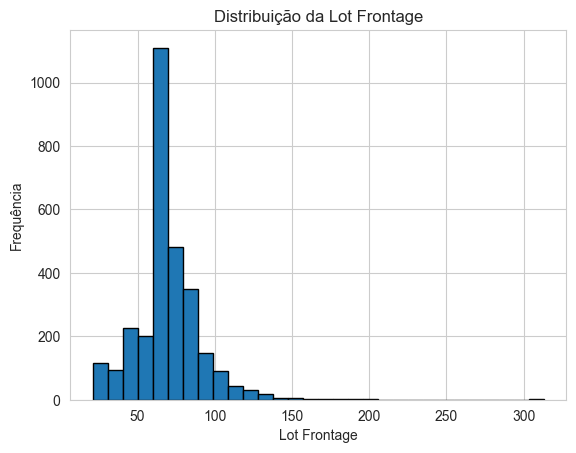

Valores ausentes restantes em Lot Frontage: 0

=== Colunas numéricas com valores ausentes ===
Series([], dtype: int64)

=== Valores ausentes restantes nas numéricas ===
0
Usei a mediana para imputar colunas enviesadas (como LotFrontage) por ser mais robusta a outliers, e a média para distribuições simétricas.


In [75]:
# 4. Investigação, justificativa e implementação da imputação numérica

# ==============================
# 2. Análise da coluna Lot Frontage
# ==============================
print("=== Estatísticas Lot Frontage ===")
print(df_processado['Lot Frontage'].describe())

# Histograma da distribuição
plt.hist(df_processado['Lot Frontage'].dropna(), bins=30, edgecolor='k')
plt.title("Distribuição da Lot Frontage")
plt.xlabel("Lot Frontage")
plt.ylabel("Frequência")
plt.show()

# ==============================
# 3. Imputação de Lot Frontage
# ==============================
# Estratégia: usar a mediana por bairro (mais robusto a outliers e captura diferenças locais)
df_processado['Lot Frontage'] = df_processado.groupby('Neighborhood')['Lot Frontage'] \
                      .transform(lambda x: x.fillna(x.median()))

print(f"Valores ausentes restantes em Lot Frontage: {df_processado['Lot Frontage'].isnull().sum()}")

# ==============================
# 4. Outras colunas numéricas com NA
# ==============================
missing_num = df_processado.select_dtypes(include=['float64','int64']).isnull().sum()
missing_num = missing_num[missing_num > 0]
print("\n=== Colunas numéricas com valores ausentes ===")
print(missing_num)

# ==============================
# 5. Imputação automática
# ==============================
for col in missing_num.index:
    # recalcula pois Lot Frontage já foi tratada
    if col == 'Lot Frontage':
        continue
    
    # Se distribuição muito enviesada -> usa mediana
    skewness = df_processado[col].dropna().skew()
    if skewness > 1 or skewness < -1:
        df_processado[col] = df_processado[col].fillna(df_processado[col].median())
        print(f"{col}: imputado com MEDIANA (skew={skewness:.2f})")
    else:
        df_processado[col] = df_processado[col].fillna(df_processado[col].mean())
        print(f"{col}: imputado com MÉDIA (skew={skewness:.2f})")

# ==============================
# 6. Verificação final
# ==============================
print("\n=== Valores ausentes restantes nas numéricas ===")
print(df_processado.select_dtypes(include=['float64','int64']).isnull().sum().sum())

print("Usei a mediana para imputar colunas enviesadas (como LotFrontage) por ser mais robusta a outliers, e a média para distribuições simétricas.")


### Seção 3: Validação de Tipos de Dados

**Enunciado:** A forma como os dados são armazenados nem sempre reflete sua natureza real. Sua tarefa é identificar e corrigir essas discrepâncias.

1.  **Tomada de Decisão:** Inspecione as colunas com tipo de dado numérico (`int64`, `float64`). Existe alguma que, apesar de ser um número, representa uma categoria (ex: um código)? Identifique-as, explique por que tratá-las como números contínuos seria um erro para um modelo de machine learning, e converta-as para um tipo de dado mais apropriado (`object` ou `category`).

In [76]:
# Célula de resposta para a Seção 3

# 1. Identifique, justifique e converta os tipos de dados
# print("As colunas X e Y são categóricas porque...")

print("\n--- 3.1: Justificativa para Conversão de Tipos ---")
print("""As colunas 'MS SubClass' e 'Mo Sold' são categóricas porque seus valores numéricos são, na verdade, códigos ou rótulos.
- 'MS SubClass' (ex: 20, 60, 120) representa o tipo da residência, não uma quantidade. Não há relação matemática onde 60 é '3 vezes' 20.
- 'Mo Sold' (1-12) representa meses, que são categorias cíclicas, não valores contínuos.

Tratá-las como números levaria um modelo de machine learning a criar uma relação de ordem e magnitude falsa entre as categorias,
o que prejudicaria sua capacidade de aprender os padrões corretos. Por isso, devem ser convertidas para o tipo 'object' (string).""")

print("\n--- 3.2: Convertendo os Tipos de Dados ---")
cols_to_convert = ['MS SubClass', 'Mo Sold']

print("\nTipos de dados ANTES da conversão:")
print(df_processado[cols_to_convert].dtypes)

for col in cols_to_convert:
    if col in df_processado.columns:
        df_processado[col] = df_processado[col].astype(str)

print("\nTipos de dados DEPOIS da conversão:")
print(df_processado[cols_to_convert].dtypes)



--- 3.1: Justificativa para Conversão de Tipos ---
As colunas 'MS SubClass' e 'Mo Sold' são categóricas porque seus valores numéricos são, na verdade, códigos ou rótulos.
- 'MS SubClass' (ex: 20, 60, 120) representa o tipo da residência, não uma quantidade. Não há relação matemática onde 60 é '3 vezes' 20.
- 'Mo Sold' (1-12) representa meses, que são categorias cíclicas, não valores contínuos.

Tratá-las como números levaria um modelo de machine learning a criar uma relação de ordem e magnitude falsa entre as categorias,
o que prejudicaria sua capacidade de aprender os padrões corretos. Por isso, devem ser convertidas para o tipo 'object' (string).

--- 3.2: Convertendo os Tipos de Dados ---

Tipos de dados ANTES da conversão:
MS SubClass    int64
Mo Sold        int64
dtype: object

Tipos de dados DEPOIS da conversão:
MS SubClass    object
Mo Sold        object
dtype: object


### Seção 4: Análise e Tratamento de Outliers

**Enunciado:** Valores extremos podem distorcer análises e prejudicar modelos. Investigue e trate os outliers de forma estratégica.

1.  Visualize a distribuição da variável alvo (`SalePrice`) e de outras features numéricas importantes, como `GrLivArea`, usando as técnicas que preferir (histogramas, box plots).
2.  Crie um gráfico de dispersão (scatter plot) para visualizar a relação entre `GrLivArea` e `SalePrice`.
3.  **Tomada de Decisão:** Com base no gráfico de dispersão, identifique visualmente as observações que parecem ser outliers problemáticos (ex: casas muito grandes com preços desproporcionalmente baixos). Defina um critério lógico para removê-los. Justifique sua escolha e implemente a remoção, explicando o impacto esperado no modelo.

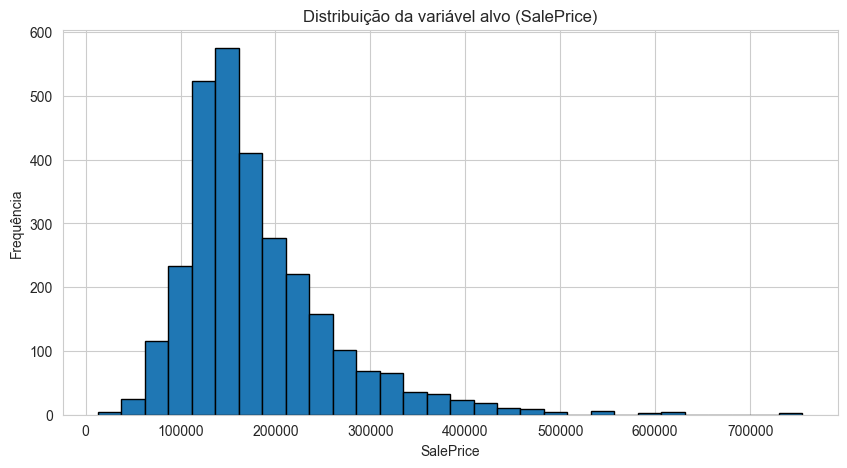

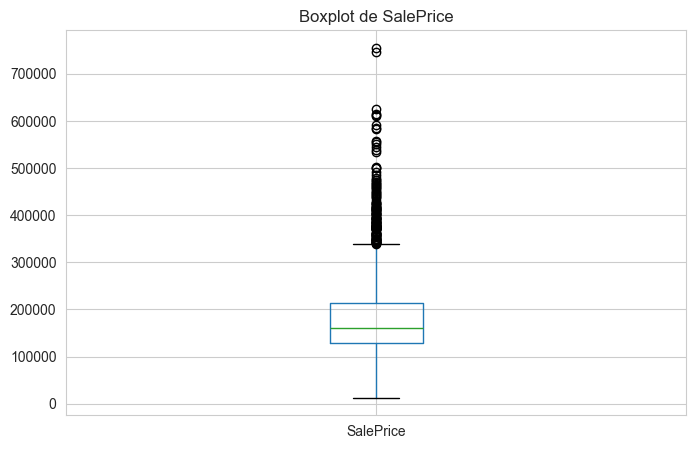

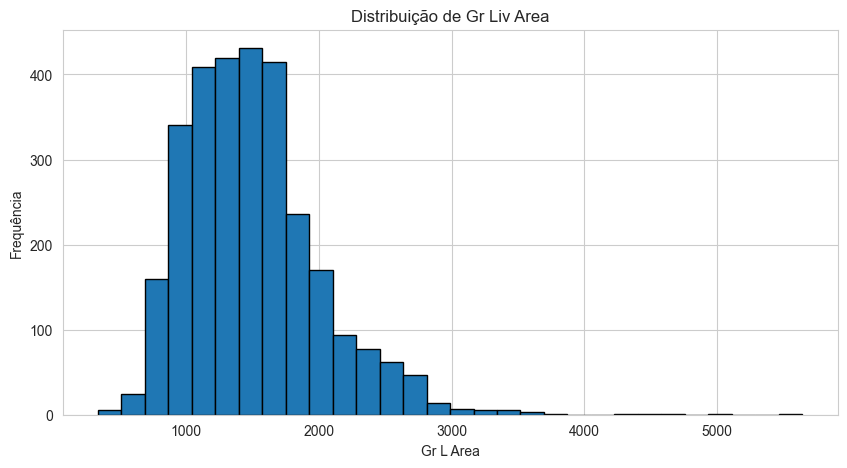

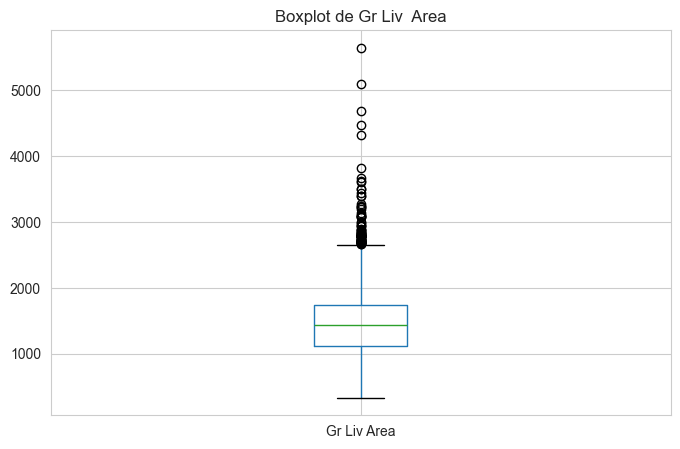

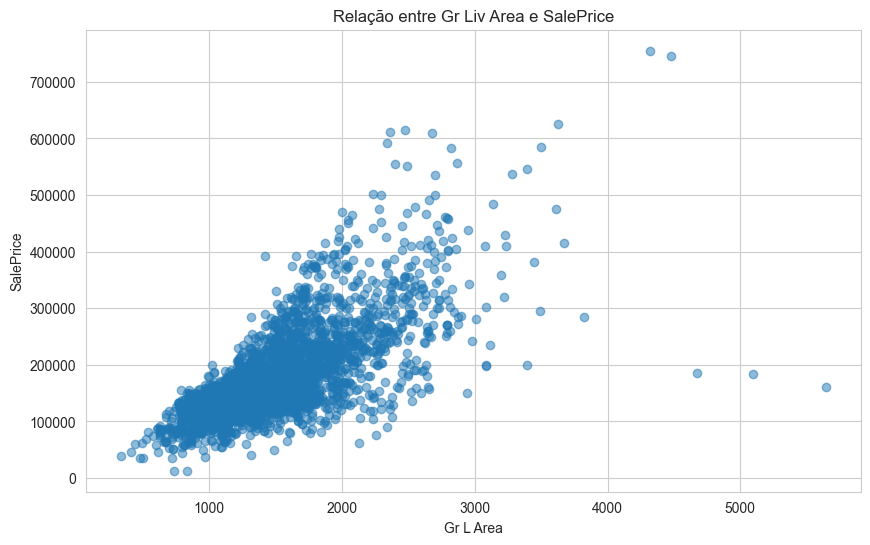

In [78]:

# =============================
# Distribuição da variável alvo SalePrice
# =============================
plt.figure(figsize=(10,5))
plt.hist(df_processado['SalePrice'], bins=30, edgecolor='k')
plt.title("Distribuição da variável alvo (SalePrice)")
plt.xlabel("SalePrice")
plt.ylabel("Frequência")
plt.show()

plt.figure(figsize=(8,5))
df_processado.boxplot(column='SalePrice')
plt.title("Boxplot de SalePrice")
plt.show()

# =============================
# Distribuição da variável de área construída
# =============================
plt.figure(figsize=(10,5))
plt.hist(df_processado['Gr Liv Area'], bins=30, edgecolor='k')
plt.title(f"Distribuição de {'Gr Liv Area'}")
plt.xlabel('Gr L Area')
plt.ylabel("Frequência")
plt.show()

plt.figure(figsize=(8,5))
df_processado.boxplot(column='Gr Liv Area')
plt.title(f"Boxplot de {'Gr Liv  Area'}")
plt.show()

# =============================
# Scatter plot: relação entre área construída e SalePrice
# =============================
plt.figure(figsize=(10,6))
plt.scatter(df_processado['Gr Liv Area'], df_processado['SalePrice'], alpha=0.5)
plt.title(f"Relação entre {'Gr Liv Area'} e SalePrice")
plt.xlabel('Gr L Area')
plt.ylabel("SalePrice")
plt.show()


In [79]:
# 3. Defina seu critério, justifique e remova os outliers
# print("Meu critério para remoção é..., porque...")
# Lembre-se de resetar o índice do DataFrame após a remoção

# Meu critério para remoção é excluir casas com GrLivArea > 4000 sqft e SalePrice < 300000,
# porque são outliers que distorcem a relação entre tamanho e preço.

# Identificar outliers
outliers = df_processado[(df_processado['Gr Liv Area'] > 4000) & (df_processado['SalePrice'] < 300000)]
print("Outliers identificados:")
print(outliers[['Gr Liv Area','SalePrice']])

# Remover e resetar índice
df_processado = df_processado.drop(outliers.index).reset_index(drop=True)

print(f"Novo tamanho do dataset: {df_processado.shape}")

print("Meu critério para remoção é excluir casas com GrLivArea > 4000 sqft e SalePrice < 300000,\nporque são outliers que distorcem a relação entre tamanho e preço.")



Outliers identificados:
      Gr Liv Area  SalePrice
1498         5642     160000
2180         5095     183850
2181         4676     184750
Novo tamanho do dataset: (2927, 77)
Meu critério para remoção é excluir casas com GrLivArea > 4000 sqft e SalePrice < 300000,
porque são outliers que distorcem a relação entre tamanho e preço.


### Seção 5: Engenharia de Features (Feature Engineering)

**Enunciado:** A criação de novas features é uma das etapas mais criativas e impactantes. Pense em como as features existentes podem ser combinadas ou transformadas para criar novas informações.

1.  **Tomada de Decisão:** Proponha e implemente a criação de pelo menos **três** novas features que você acredita que possam ser úteis para prever o preço de uma casa. Explique o raciocínio por trás de cada uma.
    * *Sugestões (sinta-se livre para criar outras):* Qual a idade da casa na data da venda? Qual a área total da casa somando todos os andares e porão? A casa foi reformada desde que foi construída?

In [81]:
# Célula de resposta para a Seção 5

# Feature 1: HouseAge
df_processado['HouseAge'] = df_processado['Yr Sold'] - df_processado['Year Built']
print("Feature 1: HouseAge criada porque casas mais novas tendem a ter maior valor de venda.")

# Feature 2: TotalArea
df_processado['TotalArea'] = df_processado['Gr Liv Area'] + df_processado['Total Bsmt SF']
print("Feature 2: TotalArea criada porque maior área útil + porão geralmente indica maior preço.")

# Feature 3: HasBeenRemodeled
df_processado['HasBeenRemodeled'] = (df_processado['Year Remod/Add'] != df_processado['Year Built']).astype(int)
print("Feature 3: HasBeenRemodeled criada para indicar casas que passaram por reforma, agregando valor.")


Feature 1: HouseAge criada porque casas mais novas tendem a ter maior valor de venda.
Feature 2: TotalArea criada porque maior área útil + porão geralmente indica maior preço.
Feature 3: HasBeenRemodeled criada para indicar casas que passaram por reforma, agregando valor.


### Seção 6: Codificação de Variáveis Categóricas

**Enunciado:** Para que o dataset possa ser usado por um modelo, todas as features precisam ser numéricas.

1.  **Tomada de Decisão:** Identifique as colunas categóricas (`object`) restantes. Qual é a estratégia de codificação mais adequada (One-Hot Encoding, Label Encoding, etc.)? Lembre-se de considerar se os dados são nominais ou ordinais e o impacto de cada técnica. Justifique sua escolha geral e implemente a codificação para transformar todas as features restantes em formato numérico.

In [82]:
# Célula de resposta para a Seção 6

# Justificativa
print("Escolhi One-Hot Encoding para todas as colunas categóricas restantes porque evita que o modelo interprete uma ordem inexistente entre categorias nominais.")

# Identificar colunas categóricas restantes
cat_cols = df_processado.select_dtypes(include=['object']).columns
print("Colunas categóricas encontradas:")
print(cat_cols)

# Implementar codificação apenas se houver colunas categóricas
if len(cat_cols) > 0:
    df_processado = pd.get_dummies(df_processado, columns=cat_cols, drop_first=True)
    print("Colunas categóricas codificadas com sucesso.")
else:
    print("Não há colunas categóricas restantes. O dataset já está totalmente numérico.")

# Visualizar as primeiras linhas do dataset final
print("Dataset após codificação:")
print(df_processado.head())




Escolhi One-Hot Encoding para todas as colunas categóricas restantes porque evita que o modelo interprete uma ordem inexistente entre categorias nominais.
Colunas categóricas encontradas:
Index(['MS SubClass', 'MS Zoning', 'Street', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Mo Sold', 'Sale Type', 'Sale Condition'],
      dtype='object')
Colunas categóricas codificadas com sucesso.
Dataset após codificação:
   Order        PID  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \

### Seção 7: Verificação Final

**Enunciado:** Antes de entregar o trabalho, faça uma verificação final para garantir que o DataFrame está impecável.

1.  Verifique se ainda existe algum valor ausente no DataFrame.
2.  Verifique os tipos de dados de todas as colunas. Todos devem ser numéricos (`int` ou `float`).
3.  Exiba as dimensões do seu DataFrame final. Compare com as dimensões originais e comente brevemente as mudanças.

In [83]:
# 1. Verificar valores ausentes
missing_values = df_processado.isnull().sum().sum()
print(f"Total de valores ausentes no DataFrame final: {missing_values}")

# 2. Verificar tipos de dados
print("\nTipos de dados das colunas:")
print(df_processado.dtypes.value_counts())

# 3. Exibir dimensões
print(f"\nDimensões do DataFrame final: {df_processado.shape}")
print(f"Dimensões do DataFrame original: {df.shape}")

# Comentário sobre as mudanças
print("\nComentário: O DataFrame final possui mais colunas devido à codificação One-Hot das variáveis categóricas e não possui valores ausentes.\nTodos os tipos de dados agora são numéricos, garantindo compatibilidade com modelos de machine learning.")


Total de valores ausentes no DataFrame final: 0

Tipos de dados das colunas:
bool       245
int64       28
float64     12
Name: count, dtype: int64

Dimensões do DataFrame final: (2927, 285)
Dimensões do DataFrame original: (2930, 82)

Comentário: O DataFrame final possui mais colunas devido à codificação One-Hot das variáveis categóricas e não possui valores ausentes.
Todos os tipos de dados agora são numéricos, garantindo compatibilidade com modelos de machine learning.
